<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex06_1_MLP_%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%B4%EC%84%9C_%EC%86%90%EA%B8%80%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 손글씨 데이터 (이미지 데이터) 를 가지고 활성화 함수, 최적화 함수를 바꿔주면서 다중분류 실습을 진행해보자!

In [27]:
# 1. 드라이브 마운트
# 2. 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
# 데이터 로드
digit=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_train (1).csv')
digit

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# 데이터 형태 확인
digit.shape

(42000, 785)

In [30]:
# 결측치 확인
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [31]:
# 데이터 확인
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# 문제 데이터와 정답 데이터 분리
X=digit.iloc[:10000,1:]
y=digit.iloc[:10000,0]
display(X,y)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0       1
1       0
2       1
3       4
4       0
       ..
9995    5
9996    0
9997    4
9998    7
9999    9
Name: label, Length: 10000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=77)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 784), (3000, 784), (7000,), (3000,))

- 지금 데이터는 머신러닝에서 사용했던 2 차원 데이터다.
- 딥러닝이라면 조금 더 복잡한 형태의 데이터를 처리할 수 있지 않을까?
- 조금 더 복잡한 손글시 데이터를 확인해보자!

In [34]:
# 3 차원의 손글씨 데이터를 받아보자
from tensorflow.keras.datasets import mnist

In [35]:
# mnist 데이터의 특징
# 우리가 머신러닝때 썼던 손글씨 데이터!
# 문제와 답, 훈련과 테스트로 모두 분리가 되어 있다.
# 데이터가 mnist 상에서는 3 차원으로 이뤄져있다.
# [[[X_train],[y_train],[X_test],[y_test]]]
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5


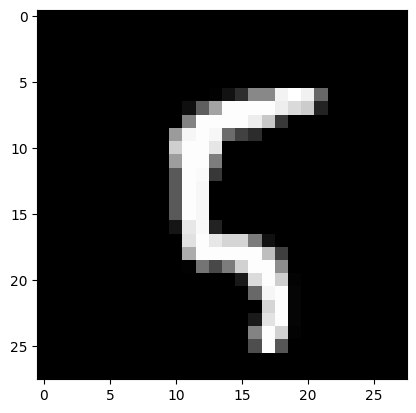

In [36]:
# 이미지를 확인해보자
digit=X_train[100]
label=y_train[100]
plt.imshow(digit,cmap='gray')
print(label)

# 이미지의 특성
# 가로 28px, 세로 28px
# 배경색은 검정 (0), 글씨는 흰색 (255) 으로 구성

In [37]:
# 데이터 전처리
# 우리가 사용하는 인공신경망의 입력 (input_dim) 은 1 차원으로 데이터를 입력받는다
# 이미지는 2 차원 => 1차원으로 변환
# 픽셀값의 범위 (0 ~ 255) 는 분산이 크다
# 0.0 ~ 1.0 사이의 범위로 변환해서 분산을 줄여주자 => 정확도 향상, 계산 용이

In [38]:
# 데이터의 형태를 변환시켜주자 (reshape)
# -1 의 의미 : 데이터의 갯수 60000 개를 제외한 모든 값을 다 곱해줘라
X_train=X_train.reshape(60000,-1) # 60000, 28*28 (784)
X_test=X_test.reshape(10000,-1) # 60000, 28*28 (784)
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [39]:
# 현재 우리가 진행하는 실습은 손글씨 숫자 '다중분류 실습'
# 정답 데이터를 원 핫 인코딩 해주자
# pd.get_dummies(대상)
# to_categorical(대상) **
from tensorflow.keras.utils import to_categorical

In [40]:
# 정답 데이터 원 핫 인코딩
y_tr_one_hot=to_categorical(y_train)
y_te_one_hot=to_categorical(y_test)
y_tr_one_hot.shape,y_te_one_hot.shape

((60000, 10), (10000, 10))

# 신경망을 구축해보자!

In [41]:
# 필요한 라이브러리 import
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
# 신경망 뼈대 설정
model1=Sequential()

# 입력층 (뉴런의 갯수는 600, 렐루 함수 사용, 데이터 갯수 ?)
model1.add(Dense(units=600,input_dim=784,activation='relu'))

# 중간층 1 (뉴런의 갯수는 300, 렐루 함수 사용)
model1.add(Dense(units=300,activation='relu'))
# 중간층 2 (뉴런의 갯수는 50, 렐루 함수 사용)
model1.add(Dense(units=50,activation='relu'))

# 출력층 (뉴런 ?, 활성화 함수 ?) => 다중분류
model1.add(Dense(units=10,activation='softmax')) # units 은 정답 갯수로 맞춤

# 모델 요약
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 600)               471000    
                                                                 
 dense_29 (Dense)            (None, 300)               180300    
                                                                 
 dense_30 (Dense)            (None, 50)                15050     
                                                                 
 dense_31 (Dense)            (None, 10)                510       
                                                                 
Total params: 666860 (2.54 MB)
Trainable params: 666860 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# 모델 학습 및 평가방법 설정
# 다중분류에 들어가는 손실함수 (loss)
# 최적화 함수 (adam)
# 평가 방법 : 정확도
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
h1=model1.fit(X_train,y_tr_one_hot,epochs=100)
model1.evaluate(X_test,y_te_one_hot)

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1440 - accuracy: 0.9760
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1070 - accuracy: 0.9750
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1266 - accuracy: 0.9777
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1604 - accuracy: 0.9776
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1167 - accuracy: 0.9820
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1639 - accuracy: 0.9711
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1250 - accuracy: 0.9795
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1347 - accuracy: 0.9749
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0901 - accuracy: 0.9775
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - 

[9.6158447265625, 0.9089999794960022]

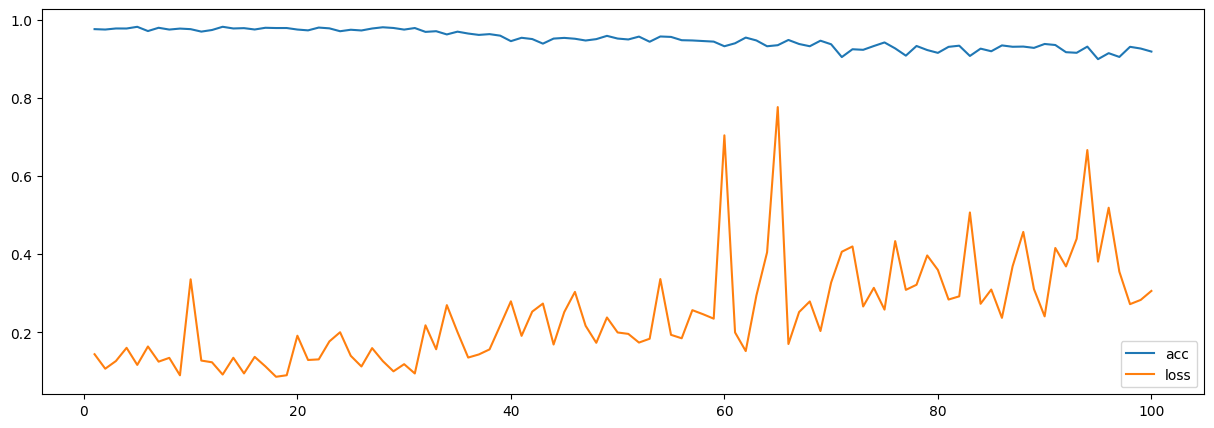

In [60]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101),h1.history['accuracy'],label='acc')
plt.plot(range(1,101),h1.history['loss'],label='loss')
plt.legend()
plt.show()

- 모델이 학습 되는 것은 알겠다!
- 모델의 성능을 검증하는 방법은 없을까?

In [61]:
# fit (모델 학습) 내부에 validation_split 기능이 있다!
# 학습을 1 epochs 씩 진행할 때마다 모델 성능 검증까지 함께 진행해주는 옵션
# 사용 방법 1 : 검증 데이터를 쪼개서 넣어주는 방법
# 사용 방법 2 : 데이터를 분할해주는 비율을 설정하는 방법

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
# 데이터를 학습용과 검증용으로 분리
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_tr_one_hot,test_size=0.2,random_state=6)

In [ ]:
# 사용 방법 1 : 검증 데이터를 쪼개서 넣어주는 방법
h2=model1.fit(X_train,y_tr_one_hot,validation_split=(X_val,y_val),epochs=50)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,51),h2.history['accuracy'],label='acc')
plt.plot(range(1,51),h2.history['loss'],label='loss')
plt.legend()
plt.show()

In [69]:
# 사용 방법 2 : 데이터를 분할해주는 비율을 설정하는 방법
h3=model1.fit(X_train,y_tr_one_hot,validation_data=(X_val,y_val),epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3990 - accuracy: 0.8907 - val_loss: 0.2848 - val_accuracy: 0.9227
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2788 - accuracy: 0.9147 - val_loss: 0.2053 - val_accuracy: 0.9275
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4124 - accuracy: 0.9085 - val_loss: 0.3306 - val_accuracy: 0.9000
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4431 - accuracy: 0.9002 - val_loss: 0.3400 - val_accuracy: 0.8869
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3826 - accuracy: 0.9018 - val_loss: 0.2410 - val_accuracy: 0.9139
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9004 - accuracy: 0.9051 - val_loss: 0.9210 - val_accuracy: 0.8942
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6736 - accuracy: 0.8745 - val_loss: 0.4348 - val_accuracy:

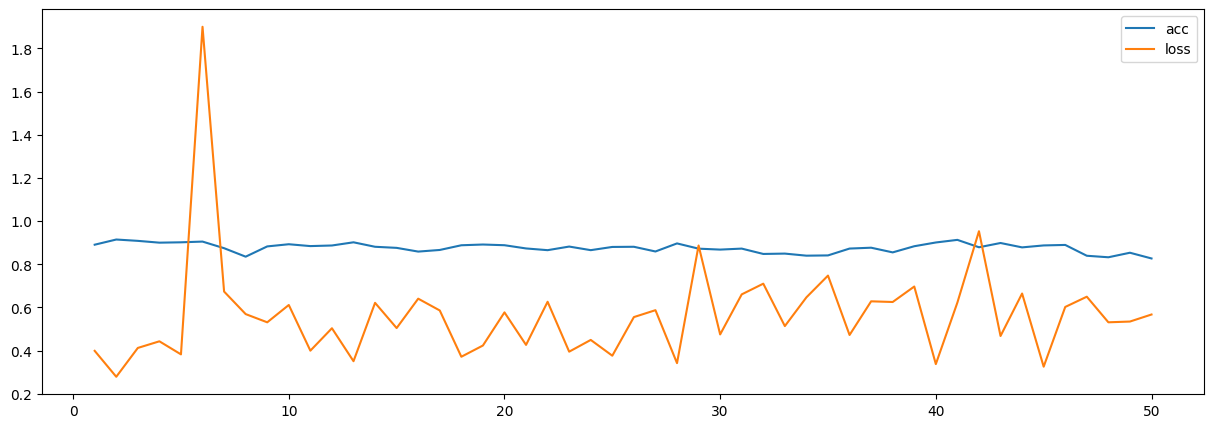

In [72]:
plt.figure(figsize=(15,5))
plt.plot(range(1,51),h3.history['accuracy'],label='acc')
plt.plot(range(1,51),h3.history['loss'],label='loss')
plt.legend()
plt.show()

In [70]:
# 모델 예측
pred=model1.predict(X_test[[1]])
print(pred.argmax()) # 최대값이 들어있는 인덱스 위치를 반환
print(y_test[[1]])

1/1 [==============================] - 0s 184ms/step
2
[2]


In [71]:
# 색다른 방법으로 모델을 사용해보자 => 인터페이스 사용
# 숫자를 직접 써보고 이 데이터로 예측을 해보자

# 라이브러리 설치
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.1 MB/s eta 0

In [73]:
# gradio import
import gradio as gr

In [152]:
# gradio 에 들어갈 함수 설정
def sketch_recoginition(img):
  img=img.reshape(1,784)
  pred=model1.predict(img)
  result=pred.argmax()
  return f'{result}'

# gradio 설정 후 사용
gr.Interface(fn=sketch_recoginition,
             inputs=gr.Sketchpad(brush_radius=0.5),
             outputs='label').launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>